### Customer Churn Prediction

This project is going to predict the customer Churn

**Data Cleaning & Precessing**
* Some variables are in string format. So i convert them into numeric or binary variables
* Categoroca Variable (State, Area) - I tried two encoding method. One is label encoding and the other is frequency encoding. Frequency Encoding lable the category by the likelihood of churn per category as label
* Frequency Encoding gives the best score

**Visualization**
* plot the distribution of each feature to check any outlier and variance
* Correlation - there are two variables are hightly correlated: total_day_minutes and total_day_charge

**Model Selection**

only numeric features are included.

Precision is used in evaluation becuase if marketers want to launch campign on those scored positive, we want to be relatively sure that they are going to leave. 

Random Forest gives the best precision score

**After tuning the hyperparameter, achieved precision score 0.96**

### Load Data 

In [1]:
import pandas as pd
import numpy as np

In [2]:
file_id = '1wvKi-E6GJnRqAkYMpVPaRc0L0XgY0Wkq'
link = 'https://drive.google.com/uc?export=download&id={FILE_ID}'
csv_url = link.format(FILE_ID = file_id)

df = pd.read_csv(csv_url)

### Data Exploration

In [3]:
df.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [4]:
print('Num of rows: ' + str(df.shape[0])) #row count
print('Num of columns: ' + str(df.shape[1])) #column count

Num of rows: 5000
Num of columns: 21


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   object 
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   object 
 4   intl_plan                      5000 non-null   object 
 5   voice_mail_plan                5000 non-null   object 
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   f

#### Data Cleaning

In [8]:
df.voice_mail_plan = df.voice_mail_plan.apply(lambda x: x.strip())
df.intl_plan = df.intl_plan.apply(lambda x: x.strip())
df.churned = df.churned.apply(lambda x: x.strip())

In [183]:
df[['voice_mail_plan', 'intl_plan', 'churned']].head()

,voice_mail_plan,intl_plan,churned
0,yes,no,0
1,yes,no,0
2,no,no,0
3,no,yes,0
4,no,yes,0


#### Understand the features

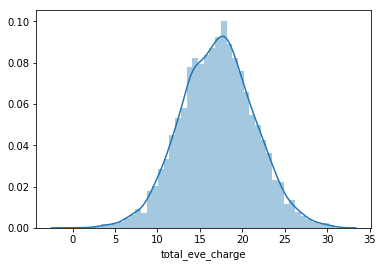

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(df.total_eve_charge)


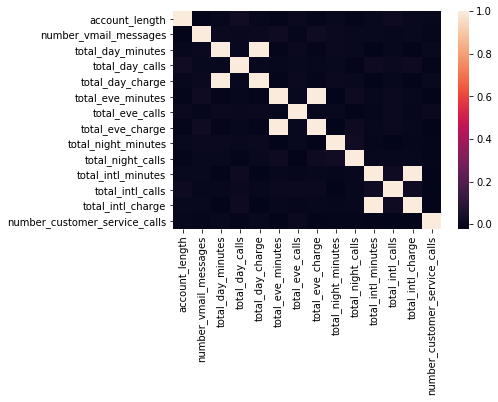

In [27]:
#correlation between all the features

corr = df[["account_length", "number_vmail_messages", "total_day_minutes",
                    "total_day_calls", "total_day_charge", "total_eve_minutes",
                    "total_eve_calls", "total_eve_charge", "total_night_minutes",
                    "total_night_calls", "total_intl_minutes", "total_intl_calls",
                    "total_intl_charge","number_customer_service_calls"]].corr()

# show heapmap of correlations
sns.heatmap(corr)

In [28]:
# check the actual values of correlations
corr

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
account_length,1.000000,-0.014575,-0.001017,0.028240,-0.001019,-0.009591,0.009143,-0.009587,0.000668,-0.007825,0.001291,0.014277,0.001292,-0.001445
number_vmail_messages,-0.014575,1.000000,0.005381,0.000883,0.005377,0.019490,-0.003954,0.019496,0.005541,0.002676,0.002463,0.000124,0.002505,-0.007086
total_day_minutes,-0.001017,0.005381,1.000000,0.001935,1.000000,-0.010750,0.008128,-0.010760,0.011799,0.004236,-0.019486,-0.001303,-0.019415,0.002733
total_day_calls,0.028240,0.000883,0.001935,1.000000,0.001936,-0.000699,0.003754,-0.000695,0.002804,-0.008308,0.013097,0.010893,0.013161,-0.010739
total_day_charge,-0.001019,0.005377,1.000000,0.001936,1.000000,-0.010747,0.008129,-0.010757,0.011801,0.004235,-0.019490,-0.001307,-0.019419,0.002726
total_eve_minutes,-0.009591,0.019490,-0.010750,-0.000699,-0.010747,1.000000,0.002763,1.000000,-0.016639,0.013420,0.000137,0.008388,0.000159,-0.013823
total_eve_calls,0.009143,-0.003954,0.008128,0.003754,0.008129,0.002763,1.000000,0.002778,0.001781,-0.013682,-0.007458,0.005574,-0.007507,0.006235
total_eve_charge,-0.009587,0.019496,-0.010760,-0.000695,-0.010757,1.000000,0.002778,1.000000,-0.016649,0.013422,0.000132,0.008393,0.000155,-0.013836
total_night_minutes,0.000668,0.005541,0.011799,0.002804,0.011801,-0.016639,0.001781,-0.016649,1.000000,0.026972,-0.006721,-0.017214,-0.006655,-0.008533
total_night_calls,-0.007825,0.002676,0.004236,-0.008308,0.004235,0.013420,-0.013682,0.013422,0.026972,1.000000,0.000391,-0.000156,0.000368,-0.008283


"total_day_minutes" and "total_day_charge" are linearly related

### Feature Preprocessing

In [10]:
# Get ground truth data
y = np.where(df.churned == 'True.', 1,0)

In [11]:
# Drop some useless columns 

#to_drop = ['state', 'area_code', 'phone_number', 'churned']
to_drop = ['area_code', 'phone_number', 'churned']
churn_feat_space = df.drop(to_drop, axis = 1)

In [12]:
# yes and no have to be converted to boolean values

yes_no_cols = ['intl_plan', 'voice_mail_plan']
churn_feat_space[yes_no_cols] = churn_feat_space[yes_no_cols] == 'yes'



In [184]:
print("After Cleaninng, all varibles are converted to numeric value or binary value")
churn_feat_space.head()

After Cleaninng, all varibles are converted to numeric value or binary value


,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,area,state
0,128,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,1,0.181818
1,107,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,1,0.129310
2,137,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,1,0.250000
3,84,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0.129310
4,75,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1,0.177778


In [185]:
# check the proportion of y = 1
print('The proportion of y = 1...')
print((y.sum() / y.shape )* 100)
# the data is actually balanced

The proportion of y = 1...
[14.14]


### Model Selection

In [76]:
# Exclude categorical variable in model selection
to_drop = ['state', 'area_code', 'phone_number', 'churned']
churn_feat_space = df.drop(to_drop, axis = 1)

#yes and no have to be converted to boolean vales
yes_no_cols = ['intl_plan', 'voice_mail_plan']
churn_feat_space[yes_no_cols] = churn_feat_space[yes_no_cols] == 'yes'

X = churn_feat_space

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

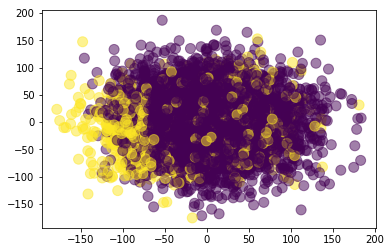

In [10]:
pca = PCA(n_components  = 2)
reduced = pca.fit_transform(X)
plt.scatter(reduced[:,0], reduced[:,1], s = 100, c = y, alpha = 0.5)
plt.show()

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 

# Logistic Regression
classifier_logistic = LogisticRegression()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# Random Forest
classifier_RF = RandomForestClassifier()

# Support Vector Machine
classfier_SVC = SVC()

In [79]:
# use precision as evaluation metrics
model_names = ['Logistic Regression', 'KNN', 'Random Forest', 'Support Vector Machine']
model_list = [classifier_logistic, classifier_KNN, classifier_RF, classfier_SVC]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X, y, cv = 5, scoring='precision')
    print(cv_score)
    print('Model precision of ' + model_names[count] + ' is ' + str(cv_score.mean()))
    count += 1

[0.60714286 0.46153846 0.57777778 0.56363636 0.60465116]
Model precision of Logistic Regression is 0.5629493245772315
[0.7704918  0.91525424 0.85454545 0.8        0.86486486]
Model precision of KNN is 0.8410312719954287
[0.88235294 0.95614035 0.93577982 0.9537037  0.98245614]
Model precision of Random Forest is 0.9420865905244012
[0.85393258 0.89655172 0.9382716  0.91954023 0.9125    ]
Model precision of Support Vector Machine is 0.9041592286461844


In [81]:
# use accuracy as evaluation metrics
model_names = ['Logistic Regression', 'KNN', 'Random Forest', 'Support Vector Machine']
model_list = [classifier_logistic, classifier_KNN, classifier_RF, classfier_SVC]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X, y, cv = 5)
    print(cv_score)
    print('Model accuracy of ' + model_names[count] + ' is ' + str(cv_score.mean()))
    count += 1

[0.871 0.855 0.866 0.865 0.867]
Model accuracy of Logistic Regression is 0.8648
[0.892 0.908 0.898 0.894 0.912]
Model accuracy of KNN is 0.9008
[0.951 0.959 0.956 0.957 0.964]
Model accuracy of Random Forest is 0.9573999999999998
[0.922 0.928 0.93  0.931 0.924]
Model accuracy of Support Vector Machine is 0.9270000000000002


Random Forest is the best

### Add in State and Area Variable

#### I am going to explore two ways to encode: Label Encode and Frequency Encode

#### Add in State, Label Encode

In [87]:
# try label encoding first
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
state = le.fit_transform(df['state'])

In [190]:
churn_feat_space_state = churn_feat_space
churn_feat_space_state['state'] = state

In [191]:
X = churn_feat_space_state


In [192]:
classifier_RF = RandomForestClassifier()

# evaluation metrics: precision
cv_score = model_selection.cross_val_score(classifier_RF, X, y, cv = 5, scoring='precision')
print(cv_score)
print('Model Precision of ' + 'Random Forest with Label Encoder' + ' is ' + str(cv_score.mean()))

[0.87288136 0.91129032 0.95454545 0.97196262 0.99074074]
Model Precision of Random Forest with Label Encoder is 0.9402840981242948


In [193]:
classifier_RF = RandomForestClassifier()
# evaluation metrics: accuracy
cv_score = model_selection.cross_val_score(classifier_RF, X, y, cv = 5)
print(cv_score)
print('Model accuracy of ' + 'Random Forest with Label Encoder' + ' is ' + str(cv_score.mean()))

[0.948 0.955 0.954 0.956 0.965]
Model accuracy of Random Forest with Label Encoder is 0.9556000000000001


#### Add in Area, Label Encode

In [82]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
area = le.fit_transform(df['area_code'])

In [195]:
churn_feat_space_area = churn_feat_space
churn_feat_space_area['area'] = area

In [196]:
X = churn_feat_space_area

In [197]:
classifier_RF = RandomForestClassifier()

# evaluation metrics: precision
cv_score = model_selection.cross_val_score(classifier_RF, X, y, cv = 5, scoring='precision')
print(cv_score)
print('Model Precision of ' + 'Random Forest with Label Encoder' + ' is ' + str(cv_score.mean()))

[0.87931034 0.90983607 0.96190476 0.96296296 1.        ]
Model Precision of Random Forest with Label Encoder is 0.9428028270538164


In [198]:
classifier_RF = RandomForestClassifier()

# evaluation metrics: precision
cv_score = model_selection.cross_val_score(classifier_RF, X, y, cv = 5)
print(cv_score)
print('Model Accuracy of ' + 'Random Forest with Label Encoder' + ' is ' + str(cv_score.mean()))

[0.948 0.959 0.956 0.955 0.964]
Model Accuracy of Random Forest with Label Encoder is 0.9564


#### frequency encoding on State Variable

Frequency Encode - Use likelihood of churn per state as label

In [95]:
df['churned'] = np.where(df.churned == 'True.', 1,0)

In [106]:
freq_map = df.groupby('state').sum().churned/df.groupby('state').count().churned

In [108]:
df.loc[:,'state_encode'] = df['state'].map(freq_map)

In [159]:
churn_feat_space_state2 = churn_feat_space
churn_feat_space_state2['state'] = df.state_encode

In [160]:
X = churn_feat_space_state2

In [161]:
classifier_RF = RandomForestClassifier()

# evaluation metrics: precision
cv_score = model_selection.cross_val_score(classifier_RF, X, y, cv = 5, scoring='precision')
print(cv_score)
print('Model Precision of ' + 'Random Forest with Label Encoder' + ' is ' + str(cv_score.mean()))

[0.8677686  0.94067797 0.98039216 0.96190476 1.        ]
Model Precision of Random Forest with Label Encoder is 0.9501486959821049


In [113]:
classifier_RF = RandomForestClassifier()

# evaluation metrics: precision
cv_score = model_selection.cross_val_score(classifier_RF, X, y, cv = 5, scoring='precision')
print(cv_score)
print('Model Precision of ' + 'Random Forest with Label Encoder' + ' is ' + str(cv_score.mean()))

[0.88888889 0.9380531  0.94594595 0.97029703 0.99074074]
Model Precision of Random Forest with Label Encoder is 0.9467851405247357


In [114]:
classifier_RF = RandomForestClassifier()

# evaluation metrics: precision
cv_score = model_selection.cross_val_score(classifier_RF, X, y, cv = 5)
print(cv_score)
print('Model Accuracy of ' + 'Random Forest with Label Encoder' + ' is ' + str(cv_score.mean()))

[0.95  0.96  0.958 0.957 0.962]
Model Accuracy of Random Forest with Label Encoder is 0.9574


#### After using frequency label, the precision and accuracy score has been improved a lot!!

### Hyper-parameter Tuning

In [120]:
from sklearn.model_selection import GridSearchCV
def print_grid_search_metrics(gs):
    print ("Best score: %0.3f" % gs.best_score_)
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

In [162]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators': (40,60,80,100) ,
    'max_depth' : (None,8,6,10)
}
Grid_RF = GridSearchCV(RandomForestClassifier(), parameters, cv = 5, scoring = 'precision')
Grid_RF.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [163]:
print_grid_search_metrics(Grid_RF)

Best score: 0.965
Best parameters set:
	max_depth: 6
	n_estimators: 60


In [165]:
classifier_RF = RandomForestClassifier(max_depth = 6, n_estimators = 60)

# evaluation metrics: precision
cv_score = model_selection.cross_val_score(classifier_RF, X, y, cv = 5, scoring='precision')
print(cv_score)
print('Model Precision of ' + 'Random Forest with Label Encoder' + ' is ' + str(cv_score.mean()))

[0.94871795 0.95454545 0.97468354 0.97435897 1.        ]
Model Precision of Random Forest with Label Encoder is 0.9704611843852351


#### After tuning the hyper-parameter, the precision score has been improved a lot !!

### Predict and Evaluate

In [176]:
from sklearn import model_selection

# Reserve 20% for testing
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' feature')
print('testing data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' feature')


training data has 4000 observation with 19 feature
testing data has 1000 observation with 19 feature


In [177]:
RF_best = RandomForestClassifier(max_depth = 6, n_estimators = 60)
RF_best.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [199]:
# Evalution
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#accuracy metrics
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print(classifier)
    print("Accuracy is: ", accuracy)
    print("Precision is: ", precision)
    #print("Recall is: ", recall)
    
#print out confusion matrices
def draw_confusion_matrices(confusion_matric):
    class_names = ['Not', 'Churn']
    classifier, cm = confusion_matric[0], confusion_matric[1]
    cal_evaluation(classifier, cm)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm, interpolation = 'nearest', cmap = plt.get_cmap('Reds'))
    plt.title('Confusion matrix for ' + classifier)
    fig.colorbar(cax)
    ax.set_xticklabels([''] + class_names)
    ax.set_yticklabels([''] + class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

Random Forest
Accuracy is:  0.934
Precision is:  0.9629629629629629


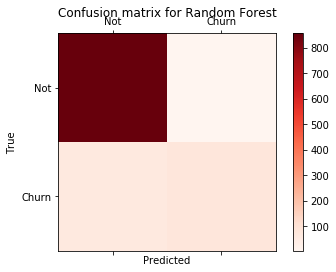

In [200]:
%matplotlib inline

# Confusion matrix, accuracy, precison and recall for random forest and logistic regression
confusion_matrices = ("Random Forest", confusion_matrix(y_test,RF_best.predict(X_test)))
   
draw_confusion_matrices(confusion_matrices)

In [180]:
from sklearn.metrics import roc_curve
from sklearn import metrics

# Use predict_proba to get the probability results of Random Forest
y_pred_rf = RF_best.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

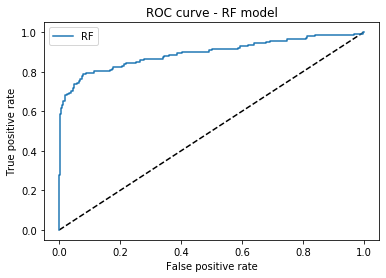

In [181]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

In [202]:
from sklearn import metrics
print('The AUC...')
metrics.auc(fpr_rf, tpr_rf)

The AUC...


0.8932537421874355

### Feature Importance Discussion

In [182]:
importances = RF_best.feature_importances_

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), X_train.columns), reverse=True):
    print (v + ": " + str(k))

Feature importance ranking by Random Forest Model:
total_day_minutes: 0.2051
total_day_charge: 0.1593
number_customer_service_calls: 0.1577
intl_plan: 0.1032
total_eve_minutes: 0.0532
total_intl_calls: 0.0438
total_intl_minutes: 0.0411
total_eve_charge: 0.0396
voice_mail_plan: 0.0377
number_vmail_messages: 0.0299
state: 0.0286
total_intl_charge: 0.0251
total_night_charge: 0.0182
total_night_minutes: 0.0176
total_day_calls: 0.0131
total_eve_calls: 0.0093
total_night_calls: 0.009
account_length: 0.0071
area: 0.0015
